In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
weather = pd.read_csv('/content/drive/MyDrive/hkdailyweather.csv', index_col="Date") ## import data

TEMP = Mean Temperature (°C) - King's Park
HUMI = Mean Relative Humidity (%) - King's Park
RAIN = Total Rainfall (mm) - King's Park
WIND = Mean Wind Speed (km/h) - King's Park
AIRP = Daily Mean Pressure (hPa) at the Hong Kong Observatory
SOLA = Global Solar Radiation (MJ/m&sup2;) - King's Park
SUNH = Total Bright Sunshine (hours) - King's Park

In [3]:
weather

,TEMP,HUMI,RAIN,WIND,AIRP,SOLA,SUNH
Date,,,,,,,
2015/1/1,15.9,56,0,7.2,1024.5,16.59,9.5
2015/1/2,14.6,69,0,8.7,1025.0,15.53,9.5
2015/1/3,15.1,63,0,9,1022.3,16.42,9.6
2015/1/4,17.1,78,0,9.1,1017.0,15.40,7.8
2015/1/5,18.8,81,0,10.6,1014.5,8.15,0.6
...,...,...,...,...,...,...,...
2024/12/27,18.6,76,0,8.3,1023.1,8.27,1.4
2024/12/28,16.3,37,0,11.4,1024.9,15.27,7.7
2024/12/29,14.7,54,0,10.5,1023.4,15.27,8.6


In [4]:
weather["TEMP"].value_counts()  ## To check the count of each data point
weather["HUMI"].value_counts()  ## if too little count, may not be useful or relevant
weather["SUNH"].value_counts()


,count
SUNH,
0.0,389
0.1,97
0.2,70
0.3,58
9.6,57
...,...
12.0,5
11.6,4
11.9,2


If value is missing, we may need to fill back data, since ML does not work well with missing value. A forward fill approach or depending situation, fill the most likely data

In [5]:
weather.dtypes # check data type, must need be numerical

,0
TEMP,object
HUMI,object
RAIN,object
WIND,object
AIRP,float64
SOLA,float64
SUNH,float64


In [6]:
weather = weather.apply(pd.to_numeric, errors='coerce').astype(float) # convert all to float type

In [7]:
weather.dtypes

,0
TEMP,float64
HUMI,float64
RAIN,float64
WIND,float64
AIRP,float64
SOLA,float64
SUNH,float64


In [8]:
weather.apply(pd.isnull).sum()/weather.shape[0] ## data cleaning : look for null value, 0 mean all value exist

,0
TEMP,0.000274
HUMI,0.000274
RAIN,0.000274
WIND,0.000548
AIRP,0.000000
SOLA,0.000000
SUNH,0.000000


In [9]:
weather["TEMP"] = weather["TEMP"].fillna(0)   # fill in all null value
weather["HUMI"] = weather["HUMI"].fillna(0)
weather["RAIN"] = weather["RAIN"].fillna(0)
weather["WIND"] = weather["WIND"].fillna(0)

In [10]:
weather.apply(pd.isnull).sum()/weather.shape[0] ## data cleaning : look for null value, 0 mean all value exist

,0
TEMP,0.0
HUMI,0.0
RAIN,0.0
WIND,0.0
AIRP,0.0
SOLA,0.0
SUNH,0.0


In [11]:
weather.index # check data type, convert to data time index using pandas function

Index(['2015/1/1', '2015/1/2', '2015/1/3', '2015/1/4', '2015/1/5', '2015/1/6',
       '2015/1/7', '2015/1/8', '2015/1/9', '2015/1/10',
       ...
       '2024/12/22', '2024/12/23', '2024/12/24', '2024/12/25', '2024/12/26',
       '2024/12/27', '2024/12/28', '2024/12/29', '2024/12/30', '2024/12/31'],
      dtype='object', name='Date', length=3652)

In [12]:
weather.index = pd.to_datetime(weather.index) # convert to data time index using pandas function

In [13]:
weather.index

DatetimeIndex(['2015-01-01', '2015-01-02', '2015-01-03', '2015-01-04',
               '2015-01-05', '2015-01-06', '2015-01-07', '2015-01-08',
               '2015-01-09', '2015-01-10',
               ...
               '2024-12-22', '2024-12-23', '2024-12-24', '2024-12-25',
               '2024-12-26', '2024-12-27', '2024-12-28', '2024-12-29',
               '2024-12-30', '2024-12-31'],
              dtype='datetime64[ns]', name='Date', length=3652, freq=None)

<Axes: xlabel='Date'>

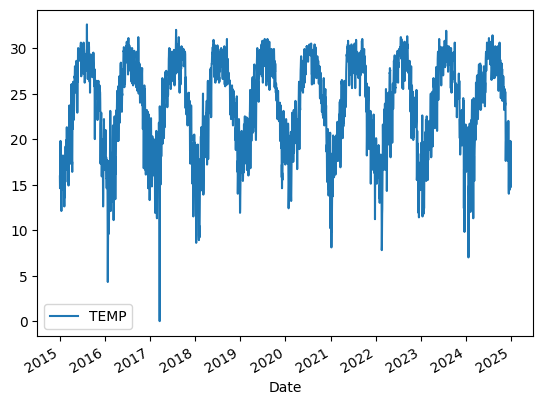

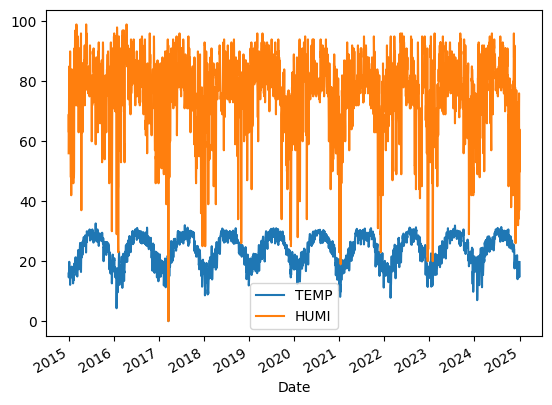

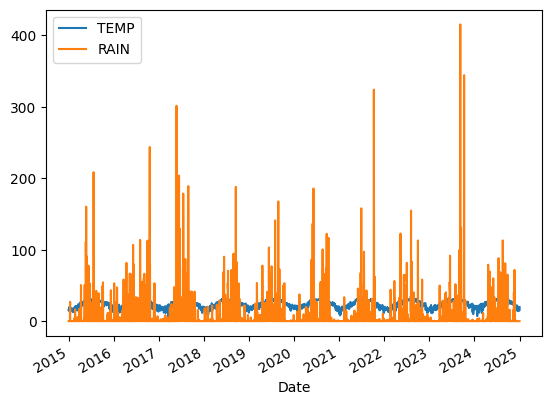

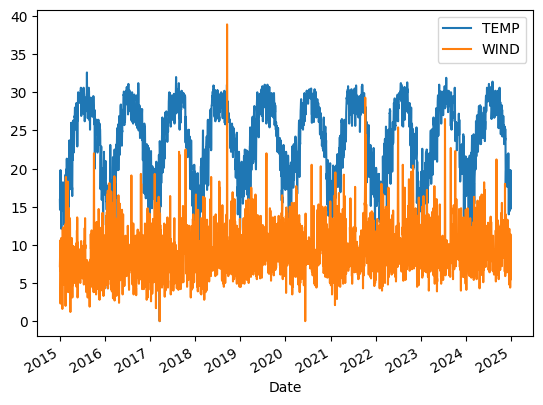

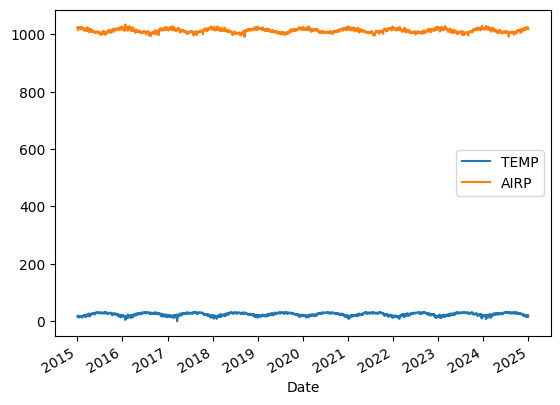

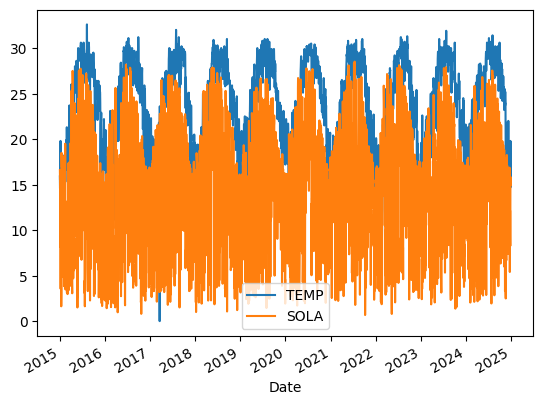

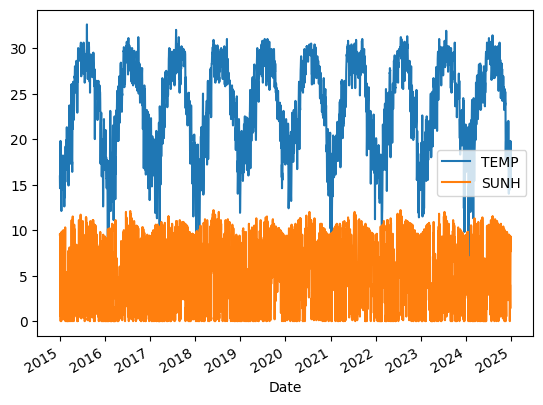

In [14]:
weather[["TEMP"]].plot()  # data visualisation

weather[["TEMP","HUMI"]].plot()
weather[["TEMP","RAIN"]].plot()
weather[["TEMP","WIND"]].plot()
weather[["TEMP","AIRP"]].plot()
weather[["TEMP","SOLA"]].plot()
weather[["TEMP","SUNH"]].plot()

<Axes: xlabel='Date'>

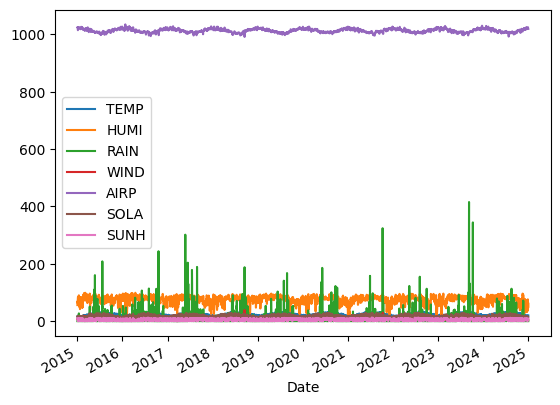

In [15]:
weather[["TEMP","HUMI","RAIN","WIND","AIRP","SOLA","SUNH"]].plot()

In [16]:
weather.groupby(weather.index.year).sum() # Data of each year

,TEMP,HUMI,RAIN,WIND,AIRP,SOLA,SUNH
Date,,,,,,,
2015,8664.3,28450.0,1962.0,2871.1,369899.6,5022.25,1769.6
2016,8510.9,28865.0,3095.5,3033.3,370667.3,4677.64,1567.8
2017,8604.1,27737.0,2739.0,3126.5,369831.7,5162.64,1873.3
2018,8586.9,27593.0,2308.7,3402.9,369573.3,5202.47,1875.0
2019,8806.3,28274.0,2446.3,3618.8,369600.6,5116.00,1902.9
2020,8756.9,27785.0,2234.2,3476.1,370908.5,5457.88,2013.5
2021,8753.2,26957.0,2101.1,3469.2,368655.2,5614.34,2179.5
2022,8504.9,27710.0,2154.6,3614.8,369631.4,5408.77,1995.2
2023,8748.0,27760.0,2678.0,3498.8,369759.7,5107.30,1865.5


<Axes: xlabel='Date'>

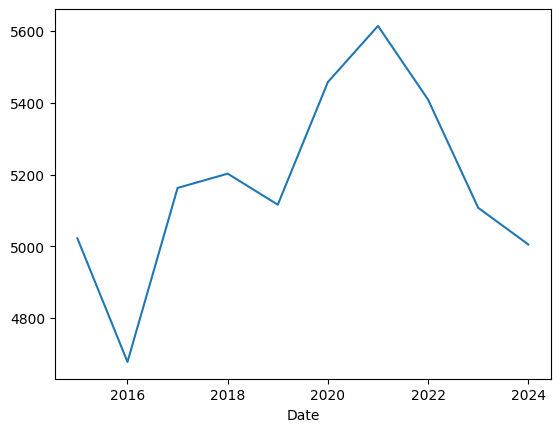

In [17]:
weather.groupby(weather.index.year).apply(lambda x: x["SOLA"].sum()).plot() # Data of each year

In [18]:
# add lag function
weather["TEMP_lag1"] = weather["TEMP"].shift(1)
weather["AIRP_lag1"] = weather["AIRP"].shift(1)
weather["HUMI_lag1"] = weather["HUMI"].shift(1)
weather["SOLA_lag1"] = weather["SOLA"].shift(1)

weather["TEMP_lag1"] = weather["TEMP_lag1"].fillna(method="bfill")
weather["AIRP_lag1"] = weather["AIRP_lag1"].fillna(method="bfill")
weather["HUMI_lag1"] = weather["HUMI_lag1"].fillna(method="bfill")
weather["SOLA_lag1"] = weather["SOLA_lag1"].fillna(method="bfill")

<ipython-input-18-e9191aa65081>:7: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  weather["TEMP_lag1"] = weather["TEMP_lag1"].fillna(method="bfill")
<ipython-input-18-e9191aa65081>:8: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  weather["AIRP_lag1"] = weather["AIRP_lag1"].fillna(method="bfill")
<ipython-input-18-e9191aa65081>:9: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  weather["HUMI_lag1"] = weather["HUMI_lag1"].fillna(method="bfill")
<ipython-input-18-e9191aa65081>:10: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  weather["SOLA_lag1"] = weather["SOLA_lag1"].fillna(method="bfill")


In [19]:
# add rolling average
window_size = 7 # 7 day rolling average

weather["TEMP_rolling_mean"] = weather["TEMP"].rolling(window=window_size, min_periods=1).mean()
weather["TEMP_rolling_std"] = weather["TEMP"].rolling(window=window_size, min_periods=1).std()
weather["TEMP_rolling_mean"] = weather["TEMP_rolling_mean"].fillna(method="bfill")
weather["TEMP_rolling_std"] = weather["TEMP_rolling_std"].fillna(method="bfill")

<ipython-input-19-af874aeac129>:6: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  weather["TEMP_rolling_mean"] = weather["TEMP_rolling_mean"].fillna(method="bfill")
<ipython-input-19-af874aeac129>:7: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  weather["TEMP_rolling_std"] = weather["TEMP_rolling_std"].fillna(method="bfill")


In [20]:
# add combine features
weather["SOLA_SUNH"] = weather["SOLA"] * weather["SUNH"]  # Effective solar energy
weather["SOLA_SUNH"] = weather["SOLA_SUNH"].fillna(method="ffill")


<ipython-input-20-c8d89f3ae0e6>:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  weather["SOLA_SUNH"] = weather["SOLA_SUNH"].fillna(method="ffill")


In [21]:
# difference features
# change in air pressure may imply temperature change
weather["AIRP_diff"] = weather["AIRP"].diff()
weather["AIRP_diff"] = weather["AIRP_diff"].fillna(method="bfill")

<ipython-input-21-cfeba58a8d19>:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  weather["AIRP_diff"] = weather["AIRP_diff"].fillna(method="bfill")


In [22]:
weather["target"] = weather.shift(-1)["TEMP"] # To predict the weather tmr

In [23]:
weather

,TEMP,HUMI,RAIN,WIND,AIRP,SOLA,SUNH,TEMP_lag1,AIRP_lag1,HUMI_lag1,SOLA_lag1,TEMP_rolling_mean,TEMP_rolling_std,SOLA_SUNH,AIRP_diff,target
Date,,,,,,,,,,,,,,,,
2015-01-01,15.9,56.0,0.0,7.2,1024.5,16.59,9.5,15.9,1024.5,56.0,16.59,15.900000,0.919239,157.605,0.5,14.6
2015-01-02,14.6,69.0,0.0,8.7,1025.0,15.53,9.5,15.9,1024.5,56.0,16.59,15.250000,0.919239,147.535,0.5,15.1
2015-01-03,15.1,63.0,0.0,9.0,1022.3,16.42,9.6,14.6,1025.0,69.0,15.53,15.200000,0.655744,157.632,-2.7,17.1
2015-01-04,17.1,78.0,0.0,9.1,1017.0,15.40,7.8,15.1,1022.3,63.0,16.42,15.675000,1.090489,120.120,-5.3,18.8
2015-01-05,18.8,81.0,0.0,10.6,1014.5,8.15,0.6,17.1,1017.0,78.0,15.40,16.300000,1.686713,4.890,-2.5,19.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-27,18.6,76.0,0.0,8.3,1023.1,8.27,1.4,19.8,1021.6,73.0,9.98,17.285714,1.596275,11.578,1.5,16.3
2024-12-28,16.3,37.0,0.0,11.4,1024.9,15.27,7.7,18.6,1023.1,76.0,8.27,17.228571,1.627590,117.579,1.8,14.7
2024-12-29,14.7,54.0,0.0,10.5,1023.4,15.27,8.6,16.3,1024.9,37.0,15.27,17.142857,1.756756,131.322,-1.5,17.2


In [24]:
weather = weather.iloc[:-1,:].copy()  # remove the last row

In [25]:
weather

,TEMP,HUMI,RAIN,WIND,AIRP,SOLA,SUNH,TEMP_lag1,AIRP_lag1,HUMI_lag1,SOLA_lag1,TEMP_rolling_mean,TEMP_rolling_std,SOLA_SUNH,AIRP_diff,target
Date,,,,,,,,,,,,,,,,
2015-01-01,15.9,56.0,0.0,7.2,1024.5,16.59,9.5,15.9,1024.5,56.0,16.59,15.900000,0.919239,157.605,0.5,14.6
2015-01-02,14.6,69.0,0.0,8.7,1025.0,15.53,9.5,15.9,1024.5,56.0,16.59,15.250000,0.919239,147.535,0.5,15.1
2015-01-03,15.1,63.0,0.0,9.0,1022.3,16.42,9.6,14.6,1025.0,69.0,15.53,15.200000,0.655744,157.632,-2.7,17.1
2015-01-04,17.1,78.0,0.0,9.1,1017.0,15.40,7.8,15.1,1022.3,63.0,16.42,15.675000,1.090489,120.120,-5.3,18.8
2015-01-05,18.8,81.0,0.0,10.6,1014.5,8.15,0.6,17.1,1017.0,78.0,15.40,16.300000,1.686713,4.890,-2.5,19.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-26,19.8,73.0,0.0,4.4,1021.6,9.98,2.6,18.0,1021.1,69.0,12.15,16.685714,1.796690,25.948,0.5,18.6
2024-12-27,18.6,76.0,0.0,8.3,1023.1,8.27,1.4,19.8,1021.6,73.0,9.98,17.285714,1.596275,11.578,1.5,16.3
2024-12-28,16.3,37.0,0.0,11.4,1024.9,15.27,7.7,18.6,1023.1,76.0,8.27,17.228571,1.627590,117.579,1.8,14.7


In [26]:
from sklearn.linear_model import Ridge  # Ridge regression
reg = Ridge(alpha=.1)                   # alpha = penalty, greater the more it prevents overfitting

In [27]:
from sklearn.linear_model import Ridge  # Ridge regression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

def create_predictions(predictors, core_weather, reg):
    # Split data into training (up to 2020-12-31) and test (2021-01-01 onward) sets
    train = core_weather.loc[:"2020-12-31"]
    test = core_weather.loc["2021-01-01":]

    # Fit the Ridge regression model on the training data using the specified predictors
    reg.fit(train[predictors], train["target"])

    # Generate predictions for both training and test sets
    train_predictions = reg.predict(train[predictors])
    test_predictions = reg.predict(test[predictors])

    # Calculate evaluation metrics for the training set
    train_mae = mean_absolute_error(train["target"], train_predictions)
    train_mse = mean_squared_error(train["target"], train_predictions)
    train_rmse = np.sqrt(train_mse)
    train_r2 = r2_score(train["target"], train_predictions)

    # Calculate evaluation metrics for the test set
    test_mae = mean_absolute_error(test["target"], test_predictions)
    test_mse = mean_squared_error(test["target"], test_predictions)
    test_rmse = np.sqrt(test_mse)
    test_r2 = r2_score(test["target"], test_predictions)

    # Combine test set actual values and predictions for further analysis
    combined = pd.concat([test["target"], pd.Series(test_predictions, index=test.index)], axis=1)
    combined.columns = ["actual", "predictions"]

    # Return all metrics and outputs for evaluation
    return (train_mae, train_mse, train_rmse, train_r2,
            test_mae, test_mse, test_rmse, test_r2,
            combined, test_predictions, test, train)

In [28]:
predictors = ["TEMP","HUMI","RAIN","WIND","AIRP","SOLA","SUNH"]

(train_mae, train_mse, train_rmse, train_r2,
 test_mae, test_mse, test_rmse, test_r2,
 combined, predictions, test, train) = create_predictions(predictors, weather, reg)


print(f"Test MAE: {test_mae:.4f}")
print(f"Test MSE: {test_mse:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")
print(f"Test R²: {test_r2:.4f}")

Test MAE: 1.0823
Test MSE: 2.2010
Test RMSE: 1.4836
Test R²: 0.9133


In [29]:
lag_pred = ["TEMP_lag1", "AIRP_lag1", "HUMI_lag1", "SOLA_lag1"]
predictors.extend(lag_pred)

(train_mae, train_mse, train_rmse, train_r2,
 test_mae, test_mse, test_rmse, test_r2,
 combined, predictions, test, train) = create_predictions(predictors, weather, reg)


print(f"Test MAE: {test_mae:.4f}")
print(f"Test MSE: {test_mse:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")
print(f"Test R²: {test_r2:.4f}")

Test MAE: 1.0501
Test MSE: 2.0944
Test RMSE: 1.4472
Test R²: 0.9175


In [30]:
rol_pred = ["TEMP_rolling_mean","TEMP_rolling_std"]
predictors.extend(rol_pred)

(train_mae, train_mse, train_rmse, train_r2,
 test_mae, test_mse, test_rmse, test_r2,
 combined, predictions, test, train) = create_predictions(predictors, weather, reg)


print(f"Test MAE: {test_mae:.4f}")
print(f"Test MSE: {test_mse:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")
print(f"Test R²: {test_r2:.4f}")

Test MAE: 1.0073
Test MSE: 1.9372
Test RMSE: 1.3918
Test R²: 0.9237


In [31]:
predictors.append("SOLA_SUNH")

(train_mae, train_mse, train_rmse, train_r2,
 test_mae, test_mse, test_rmse, test_r2,
 combined, predictions, test, train) = create_predictions(predictors, weather, reg)


print(f"Test MAE: {test_mae:.4f}")
print(f"Test MSE: {test_mse:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")
print(f"Test R²: {test_r2:.4f}")

Test MAE: 1.0064
Test MSE: 1.9320
Test RMSE: 1.3900
Test R²: 0.9239


In [32]:
predictors.append("AIRP_diff")

(train_mae, train_mse, train_rmse, train_r2,
 test_mae, test_mse, test_rmse, test_r2,
 combined, predictions, test, train) = create_predictions(predictors, weather, reg)


print(f"Test MAE: {test_mae:.4f}")
print(f"Test MSE: {test_mse:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")
print(f"Test R²: {test_r2:.4f}")

Test MAE: 1.0064
Test MSE: 1.9320
Test RMSE: 1.3900
Test R²: 0.9239


In [33]:
reg = Ridge(alpha=0.05)

(train_mae, train_mse, train_rmse, train_r2,
 test_mae, test_mse, test_rmse, test_r2,
 combined, predictions, test, train) = create_predictions(predictors, weather, reg)

print(f"Training MAE: {train_mae:.4f}")
print(f"Training MSE: {train_mse:.4f}")
print(f"Training RMSE: {train_rmse:.4f}")
print(f"Training R²: {train_r2:.4f}")
print(f"Test MAE: {test_mae:.4f}")
print(f"Test MSE: {test_mse:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")
print(f"Test R²: {test_r2:.4f}")

Training MAE: 1.0074
Training MSE: 2.1895
Training RMSE: 1.4797
Training R²: 0.9149
Test MAE: 1.0063
Test MSE: 1.9320
Test RMSE: 1.3900
Test R²: 0.9239


In [34]:
reg = Ridge(alpha=0.01)

(train_mae, train_mse, train_rmse, train_r2,
 test_mae, test_mse, test_rmse, test_r2,
 combined, predictions, test, train) = create_predictions(predictors, weather, reg)

print(f"Training MAE: {train_mae:.4f}")
print(f"Training MSE: {train_mse:.4f}")
print(f"Training RMSE: {train_rmse:.4f}")
print(f"Training R²: {train_r2:.4f}")
print(f"Test MAE: {test_mae:.4f}")
print(f"Test MSE: {test_mse:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")
print(f"Test R²: {test_r2:.4f}")

Training MAE: 1.0072
Training MSE: 2.1894
Training RMSE: 1.4797
Training R²: 0.9149
Test MAE: 1.0063
Test MSE: 1.9319
Test RMSE: 1.3899
Test R²: 0.9239


In [35]:
reg = Ridge(alpha=0.5)

(train_mae, train_mse, train_rmse, train_r2,
 test_mae, test_mse, test_rmse, test_r2,
 combined, predictions, test, train) = create_predictions(predictors, weather, reg)

print(f"Training MAE: {train_mae:.4f}")
print(f"Training MSE: {train_mse:.4f}")
print(f"Training RMSE: {train_rmse:.4f}")
print(f"Training R²: {train_r2:.4f}")
print(f"Test MAE: {test_mae:.4f}")
print(f"Test MSE: {test_mse:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")
print(f"Test R²: {test_r2:.4f}")

Training MAE: 1.0077
Training MSE: 2.1899
Training RMSE: 1.4798
Training R²: 0.9149
Test MAE: 1.0064
Test MSE: 1.9320
Test RMSE: 1.3900
Test R²: 0.9239


In [36]:
reg = Ridge(alpha=0.1)
(train_mae, train_mse, train_rmse, train_r2,
 test_mae, test_mse, test_rmse, test_r2,
 combined, predictions, test, train) = create_predictions(predictors, weather, reg)


print(f"Training MAE: {train_mae:.4f}")
print(f"Training MSE: {train_mse:.4f}")
print(f"Training RMSE: {train_rmse:.4f}")
print(f"Training R²: {train_r2:.4f}")
print(f"Test MAE: {test_mae:.4f}")
print(f"Test MSE: {test_mse:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")
print(f"Test R²: {test_r2:.4f}")

Training MAE: 1.0075
Training MSE: 2.1896
Training RMSE: 1.4797
Training R²: 0.9149
Test MAE: 1.0064
Test MSE: 1.9320
Test RMSE: 1.3900
Test R²: 0.9239


In [37]:
combined = pd.concat([test["target"], pd.Series(predictions, index=test.index)], axis=1)
combined.columns = ["actual", "predictions"]

In [38]:
combined

,actual,predictions
Date,,
2021-01-01,13.7,13.770123
2021-01-02,16.7,15.613383
2021-01-03,17.9,17.281051
2021-01-04,18.4,17.988670
2021-01-05,16.5,17.852271
...,...,...
2024-12-26,18.6,19.443620
2024-12-27,16.3,18.229193
2024-12-28,14.7,15.768926


<Axes: xlabel='Date'>

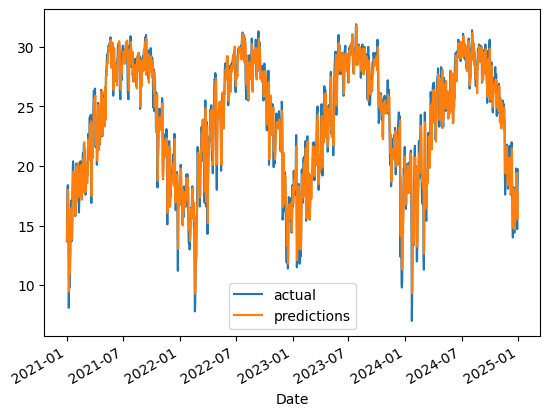

In [39]:
combined.plot()

In [40]:
try:
    print("Model coefficients:", reg.coef_)
except AttributeError:
    print("Error: Model is not fitted. Please ensure the model is trained before accessing coef_.")
# ["TEMP","HUMI","RAIN","WIND","AIRP","SOLA","SUNH"]
# relationship betweem data and prediction
# higher the better

Model coefficients: [ 0.81062319  0.00516122  0.00671212 -0.02158736  1.0748052   0.08915071
 -0.21875529 -0.11946172 -1.06744799 -0.01266672 -0.00288461  0.26854283
  0.07580044  0.00335493 -1.19979979]


In [41]:
weather.corr()["target"]  # correlation

,target
TEMP,0.952796
HUMI,0.328191
RAIN,0.130870
WIND,-0.093983
AIRP,-0.819221
SOLA,0.392833
SUNH,0.215040
TEMP_lag1,0.901132
AIRP_lag1,-0.779409
HUMI_lag1,0.299360


In [42]:
combined["diff"] = (combined["actual"] - combined["predictions"]).abs()

In [43]:
combined.sort_values("diff", ascending=False).head(10)

,actual,predictions,diff
Date,,,
2024-01-22,7.0,15.068764,8.068764
2021-01-07,8.1,14.872110,6.772110
2022-10-17,20.1,26.289432,6.189432
2024-02-29,12.4,18.581694,6.181694
2023-12-15,18.0,23.853753,5.853753
2022-03-22,17.1,22.811319,5.711319
2022-11-30,15.5,21.096641,5.596641
2023-12-16,12.4,17.978856,5.578856
2023-01-15,11.5,16.949472,5.449472
